## Time series
- `pd.date_range()` (freq=[frequency string](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases))
- `.loc[]`
- `.asfreq()` (~ reindex avec un autre date_range)
- `.resample()`
  - downsampling (~ groupby) /!\ label=
  - upsampling  (~ asfreq)

In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
matplotlib.style.use('seaborn')
sns.set(rc={'figure.figsize': (12, 7)})

In [25]:
pd.date_range('2019-01-01', '2019-01-31', freq='D')

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31'],
              dtype='datetime64[ns]', freq='D')

In [31]:
df = pd.DataFrame({'x': range(200)}, 
                  index=pd.date_range('2018-12-20', periods=200, freq='B'))

- `.shift()` et calcul d'évolution

In [50]:
df2 = pd.DataFrame({'x': range(1, 13)}, 
                   index=pd.date_range('2018-12-20', freq='B', periods=12))

In [51]:
df2

,x
2018-12-20,1
2018-12-21,2
2018-12-24,3
2018-12-25,4
2018-12-26,5
2018-12-27,6
2018-12-28,7
2018-12-31,8
2019-01-01,9
2019-01-02,10


In [57]:
df2.x / df2.shift().x

2018-12-20         NaN
2018-12-21    2.000000
2018-12-24    1.500000
2018-12-25    1.333333
2018-12-26    1.250000
2018-12-27    1.200000
2018-12-28    1.166667
2018-12-31    1.142857
2019-01-01    1.125000
2019-01-02    1.111111
2019-01-03    1.100000
2019-01-04    1.090909
Freq: B, Name: x, dtype: float64

In [56]:
df2.shift(freq='D')

,x
2018-12-21,1
2018-12-22,2
2018-12-25,3
2018-12-26,4
2018-12-27,5
2018-12-28,6
2018-12-29,7
2019-01-01,8
2019-01-02,9
2019-01-03,10


Sans tenir compte des jours manquants:

In [5]:
df2.x / df2.shift(1).x

2018-12-20         NaN
2018-12-21    2.000000
2018-12-24    1.500000
2018-12-25    1.333333
2018-12-26    1.250000
2018-12-27    1.200000
2018-12-28    1.166667
2018-12-31    1.142857
2019-01-01    1.125000
2019-01-02    1.111111
2019-01-03    1.100000
2019-01-04    1.090909
Freq: B, Name: x, dtype: float64

En tenant compte des jours manquants:

In [58]:
joined = df2.join(df2.shift(1, freq='D'), lsuffix='_a', rsuffix='_b')


In [59]:
joined

,x_a,x_b
2018-12-20,1,NaN
2018-12-21,2,1.0
2018-12-24,3,NaN
2018-12-25,4,3.0
2018-12-26,5,4.0
2018-12-27,6,5.0
2018-12-28,7,6.0
2018-12-31,8,NaN
2019-01-01,9,8.0
2019-01-02,10,9.0


In [62]:
df3 = df2.asfreq('D')

In [67]:
(df3.x / df3.shift().x).reindex(df2.index)

2018-12-20         NaN
2018-12-21    2.000000
2018-12-24         NaN
2018-12-25    1.333333
2018-12-26    1.250000
2018-12-27    1.200000
2018-12-28    1.166667
2018-12-31         NaN
2019-01-01    1.125000
2019-01-02    1.111111
2019-01-03    1.100000
2019-01-04    1.090909
Freq: B, Name: x, dtype: float64

Autre manière: (avec asfreq)

In [7]:
df3 = df2.asfreq('D')
(df3.x / df3.shift(1).x).reindex(df2.index)

2018-12-20         NaN
2018-12-21    2.000000
2018-12-24         NaN
2018-12-25    1.333333
2018-12-26    1.250000
2018-12-27    1.200000
2018-12-28    1.166667
2018-12-31         NaN
2019-01-01    1.125000
2019-01-02    1.111111
2019-01-03    1.100000
2019-01-04    1.090909
Freq: B, Name: x, dtype: float64

timezones (`.tz_localize()` / `.tz_convert()`)

In [68]:
btc = pd.read_csv('./coinbase_btcusd.csv', skiprows=1)
btc['Date'] = pd.to_datetime(btc.Date, format='%Y-%m-%d %I-%p')
btc = btc[['Date', 'Close', 'High', 'Low']]\
      .rename(columns={'Date': 'date', 'Close': 'value'})
btc = btc.set_index('date').sort_index()

In [69]:
btc.head()

,value,High,Low
date,,,
2017-07-01 11:00:00,2509.17,2513.38,2495.12
2017-07-01 12:00:00,2488.43,2512.87,2484.99
2017-07-01 13:00:00,2454.43,2488.43,2454.40
2017-07-01 14:00:00,2459.35,2473.93,2450.83
2017-07-01 15:00:00,2467.83,2475.00,2450.00


In [71]:
btc.head().tz_localize('Europe/Paris').tz_convert('Asia/Tokyo')

,value,High,Low
date,,,
2017-07-01 18:00:00+09:00,2509.17,2513.38,2495.12
2017-07-01 19:00:00+09:00,2488.43,2512.87,2484.99
2017-07-01 20:00:00+09:00,2454.43,2488.43,2454.40
2017-07-01 21:00:00+09:00,2459.35,2473.93,2450.83
2017-07-01 22:00:00+09:00,2467.83,2475.00,2450.00


## Visualizing time series

df.plot()

In [77]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
matplotlib.style.use('seaborn')
sns.set(rc={'figure.figsize': (12, 7)})

In [73]:
btc = pd.read_csv('./coinbase_btcusd.csv', skiprows=1)
btc['Date'] = pd.to_datetime(btc.Date, format='%Y-%m-%d %I-%p')
btc = btc[['Date', 'Close', 'High', 'Low']]\
      .rename(columns={'Date': 'date', 'Close': 'value'})
btc = btc.set_index('date').sort_index()

In [74]:
btc.head()

,value,High,Low
date,,,
2017-07-01 11:00:00,2509.17,2513.38,2495.12
2017-07-01 12:00:00,2488.43,2512.87,2484.99
2017-07-01 13:00:00,2454.43,2488.43,2454.40
2017-07-01 14:00:00,2459.35,2473.93,2450.83
2017-07-01 15:00:00,2467.83,2475.00,2450.00


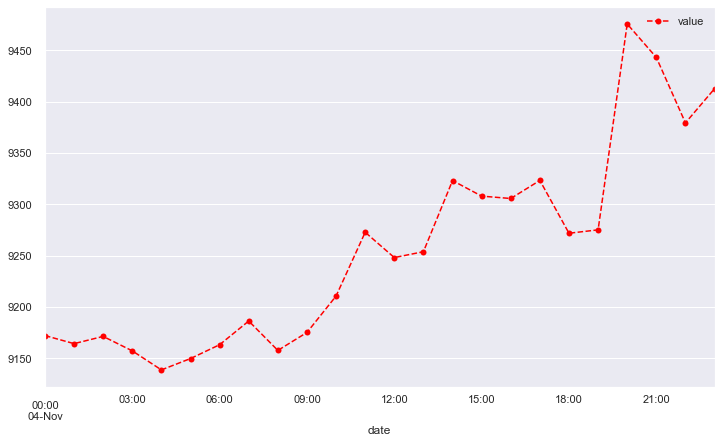

In [83]:
btc.loc['2019-11-04'].plot(y='value', linestyle='--', marker='o', color='red')

In [104]:
btc_agg = btc.resample('W').agg(['mean', 'std'])
btc_agg = btc_agg['value']

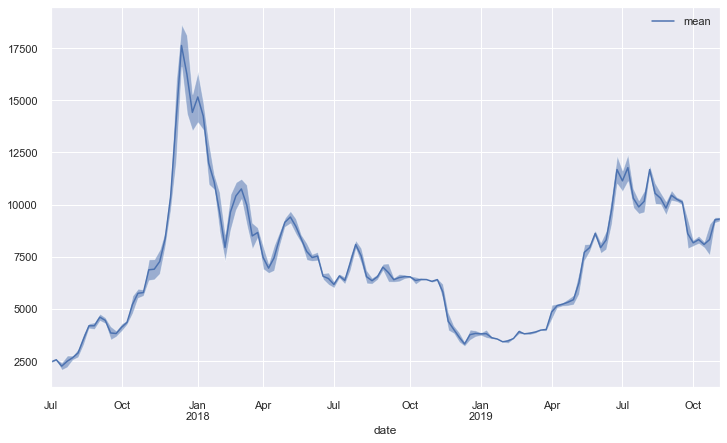

In [105]:
ax = btc_agg.plot(y='mean')
ax.fill_between(btc_agg.index, btc_agg['mean'] - btc_agg['std'],
                btc_agg['mean'] + btc_agg['std'], alpha=0.5)

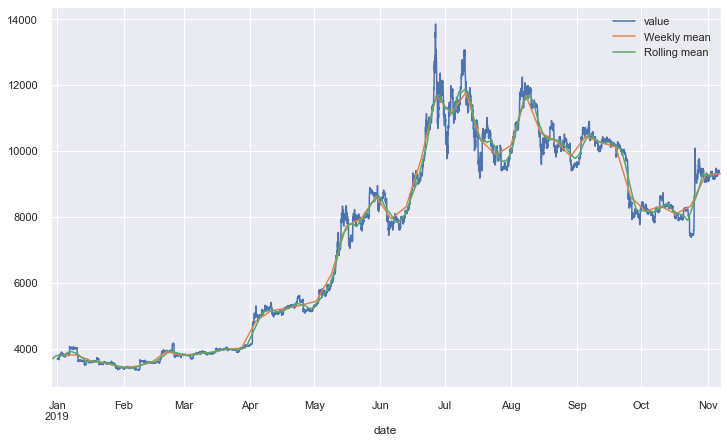

In [123]:
bt9 = btc.loc['2019']
ax = bt9.plot(y='value')
bt9.resample('W').mean().shift(freq='72H').plot(ax=ax, y='value', label='Weekly mean')
bt9.rolling(window='7D', min_periods=1).mean().shift(freq='-72H').plot(ax=ax, y='value', label='Rolling mean')

In [119]:
bt9.rolling(window='7D', min_periods=1).mean().head(10)

,value,High,Low
date,,,
2019-01-01 00:00:00,3691.890000,3701.730000,3680.630000
2019-01-01 01:00:00,3684.275000,3697.700000,3676.750000
2019-01-01 02:00:00,3680.850000,3691.466667,3673.300000
2019-01-01 03:00:00,3681.137500,3689.600000,3673.472500
2019-01-01 04:00:00,3681.270000,3691.680000,3674.604000
2019-01-01 05:00:00,3682.725000,3691.400000,3675.803333
2019-01-01 06:00:00,3683.957143,3691.911429,3677.688571
2019-01-01 07:00:00,3686.201250,3694.797500,3679.396250
2019-01-01 08:00:00,3689.228889,3698.153333,3681.790000
